# A. Load HDF5 Data 

In [84]:
import pandas as pd

pd.set_option('display.max_rows',30)
pd.set_option('display.max_columns',500)

y_test = pd.read_hdf('y_test.hdf')
X_train = pd.read_hdf('X_train.hdf')
y_train = pd.read_hdf('y_train.hdf')
X_test = pd.read_hdf('X_test.hdf')

print(X_test.shape)
print(X_train.shape)

(82251, 265)
(1113529, 265)


In [2]:
X_train.reset_index(level=[0, 1], inplace=True)
X_train.rename(columns={b'encounterID':'encounterID',b'absoluteTime':'absoutleTime'},inplace=True)
X_test.reset_index(level=[0, 1], inplace=True)
X_test.rename(columns={b'encounterID':'encounterID',b'absoluteTime':'absoutleTime'},inplace=True)
y_train.reset_index(level=[0, 1], inplace=True)
y_train.rename(columns={b'encounterID':'encounterID',b'absoluteTime':'absoutleTime'},inplace=True)
y_test.reset_index(level=[0, 1], inplace=True)
y_test.rename(columns={b'encounterID':'encounterID',b'absoluteTime':'absoutleTime'},inplace=True)

In [3]:
import numpy as np
F = X_train.isnull().sum(axis=1)
print(np.median(F))
print(np.mean(F))
x = []
for i in range(len(F[:])):
    if F[i] <= 254:
        x = np.append(x,i)
        
X_train_df = X_train.iloc[x]
X_train_df = X_train_df.fillna(0)
y_train_df = y_train.iloc[x]
print(len(x))
print(len(X_train))
print(len(X_train_df))

256.0
254.3618361084444
479619
1113529
479619


In [4]:
array = X_train_df.pivot_table(index="encounterID").as_matrix()


/home/max/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [11]:
#X_train_df["encounterID"]==8


In [13]:
print(X_train_df.shape)
print(y_train_df.shape)
print(array.shape)

(479619, 267)
(479619,)
(5000, 266)


In [37]:
#X_train_df.drop(X_train.columns[0], axis=1)

267

In [46]:
#histogram of number of samples per patient 
# At least 100 time sequences
# Only a few features  df = df.values

x_train = X_train_df.values
y_train = y_train_df["mortalityResponse"].values

In [47]:
import tensorflow as tf
#x_train = tf.convert_to_tensor(X_train_df)
#y_train = tf.convert_to_tensor(y_train)
x_train = x_train[:,np.newaxis]
print(x_train.shape)
print(y_train.shape)



(479619, 1, 267)
(479619,)


In [53]:
from keras import layers
from keras import Input
from keras.models import Model
from keras.models import Sequential

model = Sequential()
model.add(layers.LSTM(267, input_shape=(1, 267)))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=2048,
                    validation_split=0.2,
                    verbose=1)

Train on 383695 samples, validate on 95924 samples
Epoch 1/10
383695/383695 [==============================] - 9s 23us/step - loss: 0.3308 - acc: 0.8873 - val_loss: 0.3766 - val_acc: 0.8742
Epoch 2/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.3050 - acc: 0.8946 - val_loss: 0.3709 - val_acc: 0.8742
Epoch 3/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.2935 - acc: 0.8967 - val_loss: 0.3496 - val_acc: 0.8742
Epoch 4/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.2852 - acc: 0.8989 - val_loss: 0.3522 - val_acc: 0.8735
Epoch 5/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.2794 - acc: 0.9008 - val_loss: 0.4132 - val_acc: 0.8742
Epoch 6/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.2738 - acc: 0.9020 - val_loss: 0.3469 - val_acc: 0.8742
Epoch 7/10
383695/383695 [==============================] - 7s 19us/step - loss: 0.2706 - acc: 0.9034 - val_loss: 0

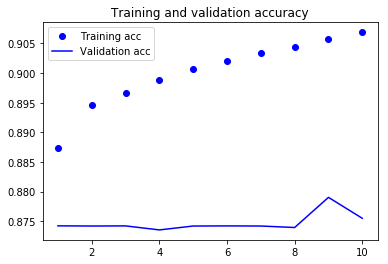

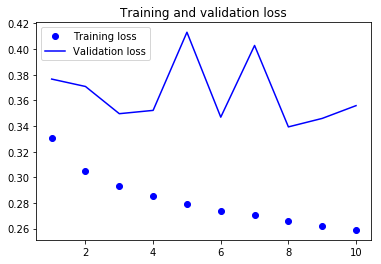

In [58]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [83]:
F = X_test.isnull().sum(axis=1)
F = F.values
print(np.median(F))
print(np.mean(F))
x = []
for i in range(len(F[:])):
    if F[i] <= 254:
        x = np.append(x,i)
        
X_test1 = X_test.iloc[x]
X_test1 = X_test1.fillna(0)
X_test1 = X_test1.values
X_test1 = X_test1[:,np.newaxis]

print(X_test.shape)
print(X_test1.shape)

257.0
255.08049750155013
(82251, 265)
(30668, 1, 265)


array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         4.07000000e+01, 0.00000000e+00, 1.66666675e-02]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 8.66666675e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.00000000e+00]],

       ...,

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 9.51000000e+00, 3.16666663e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.86999998e+01, 0.00000000e+00, 1.66666672e-01]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 5.83333313e-01]]])